<a href="https://colab.research.google.com/github/Yasminshaker/Data201/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Crash Reporting is a data set from the Data Montgomery site, provided by the police department
* This set has over 170k rows and 43 columns, and it weekly updated
* link : https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632/about_data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [97]:
cd = pd.read_csv('/content/crash.csv')
cd.head()

<ipython-input-97-68fd14277e0d>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cd = pd.read_csv('/content/crash.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP28630031,230069190,Montgomery County Police,Property Damage Crash,11/30/2023 04:45:00 PM,NaN,NaN,NaN,NaN,PARKING LOT NEAR 15350 SHADY GROVE RAOD,...,0,No,No,2011,CHEVY,SEDAN,NaN,39.118193,-77.183500,"(39.11819267, -77.18349983)"
1,MCP28630031,230069190,Montgomery County Police,Property Damage Crash,11/30/2023 04:45:00 PM,NaN,NaN,NaN,NaN,PARKING LOT NEAR 15350 SHADY GROVE RAOD,...,0,Unknown,Yes,2012,AUDI,A6,NaN,39.118193,-77.183500,"(39.11819267, -77.18349983)"
2,DD5612004P,230069125,Rockville Police Departme,Property Damage Crash,11/30/2023 12:13:00 PM,NaN,NaN,NaN,NaN,REAR PARKING LOT OF 44 RESEARCH PL\nCUBESMART,...,5,No,No,2012,JEEP,TK,NO MISUSE,39.105578,-77.184777,"(39.10557812, -77.18477672)"
3,MCP2269002Q,230069069,Montgomery County Police,Property Damage Crash,11/30/2023 09:37:00 AM,County,BOWIE MILL RD,County,FRALEY FARM RD,NaN,...,35,No,No,2013,NISS,SD,NO MISUSE,39.148647,-77.115405,"(39.14864674, -77.11540461)"
4,MCP120500B5,230069071,Montgomery County Police,Property Damage Crash,11/30/2023 09:32:00 AM,County,SPENCER RD,County,ELLINGSON DR,NaN,...,25,No,No,2020,THOMAS,BUS,NO MISUSE,38.993157,-77.056000,"(38.99315667, -77.056)"


In [98]:
d = ['Report Number', 'Local Case Number', 'Route Type', 'Road Name', 'Cross-Street Type', 'Vehicle Make', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Traffic Control','Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Injury Severity', 'Circumstance', 'Vehicle ID', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude', 'Location']
cd.drop(columns=d, inplace=True)

cd['Crash Date/Time'] = pd.to_datetime(cd['Crash Date/Time'])
cd['Year'] = cd['Crash Date/Time'].dt.year

cd.drop(columns='Crash Date/Time', inplace=True)

cd = cd.dropna()

cd.head()


,Agency Name,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Driver At Fault,Driver Distracted By,Drivers License State,Vehicle Damage Extent,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Year
3,Montgomery County Police,Property Damage Crash,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,Yes,NOT DISTRACTED,MD,DISABLING,35,No,No,2013,2023
4,Montgomery County Police,Property Damage Crash,SAME DIRECTION RIGHT TURN,CLEAR,DRY,DAYLIGHT,Yes,NOT DISTRACTED,MD,SUPERFICIAL,25,No,No,2020,2023
5,Montgomery County Police,Property Damage Crash,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,Yes,NOT DISTRACTED,MD,SUPERFICIAL,30,No,No,2015,2023
6,Montgomery County Police,Property Damage Crash,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,No,NOT DISTRACTED,MD,SUPERFICIAL,30,No,No,2016,2023
7,Montgomery County Police,Injury Crash,OPPOSITE DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,Yes,UNKNOWN,MD,DISABLING,25,No,No,2023,2023


In [99]:
cd['Weather'].value_counts().head(5)

CLEAR      96514
RAINING    18113
CLOUDY     14743
SNOW        1251
FOGGY        574
Name: Weather, dtype: int64

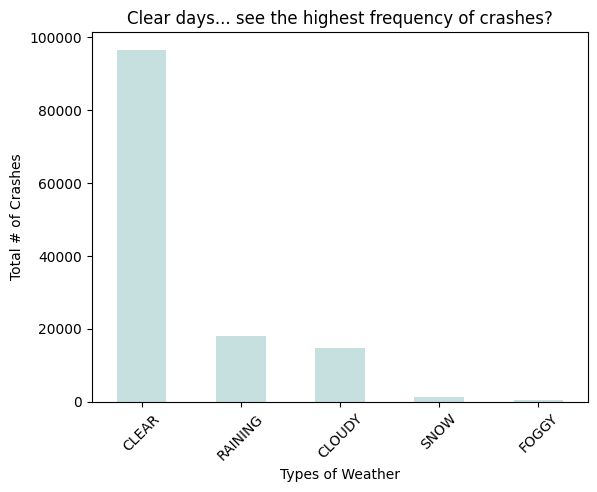

In [100]:
# How was the weather?

cd_w = cd[cd['Weather'].isin(['CLEAR', 'RAINING', 'CLOUDY', 'SNOW', 'FOGGY'])]
cd_w_count = cd_w['Weather'].value_counts()

cd_w_count.plot(kind='bar', color='#c6dfdf')
plt.xlabel('Types of Weather'), plt.ylabel('Total # of Crashes'), plt.title('Clear days... see the highest frequency of crashes?')
plt.xticks(rotation=45)
plt.show()

In [101]:
cd['Driver Distracted By'].value_counts()

NOT DISTRACTED                                       87884
UNKNOWN                                              19308
LOOKED BUT DID NOT SEE                               16625
INATTENTIVE OR LOST IN THOUGHT                        3439
OTHER DISTRACTION                                     2553
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT           777
BY OTHER OCCUPANTS                                     346
OTHER CELLULAR PHONE RELATED                           316
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)      284
TALKING OR LISTENING TO CELLULAR PHONE                 217
BY MOVING OBJECT IN VEHICLE                            187
EATING OR DRINKING                                     169
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                117
USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE         67
NO DRIVER PRESENT                                       64
USING DEVICE OBJECT BROUGHT INTO VEHICLE                56
TEXTING FROM A CELLULAR PHONE                           

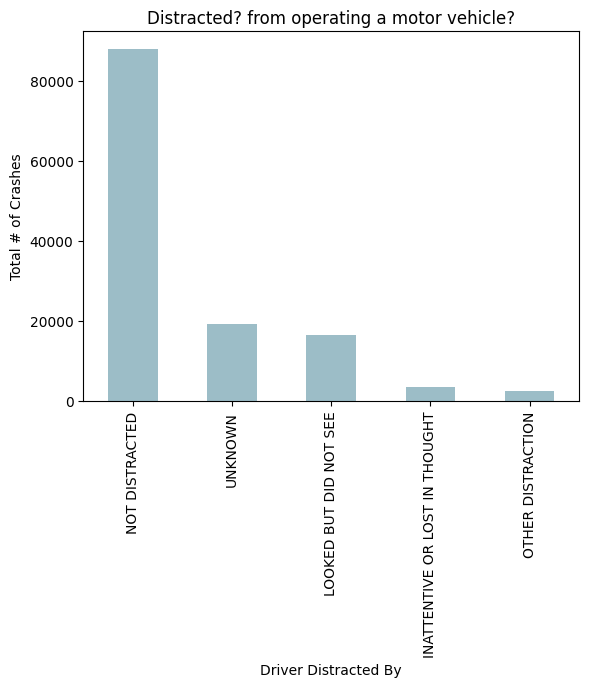

In [102]:
# Plotting the top 'distractions'

distracted = cd['Driver Distracted By'].value_counts().head(5)
distracted.plot(kind='bar', color='#9cbdc7')
plt.xlabel('Driver Distracted By'), plt.ylabel('Total # of Crashes'), plt.title('Distracted? from operating a motor vehicle?')
plt.show()


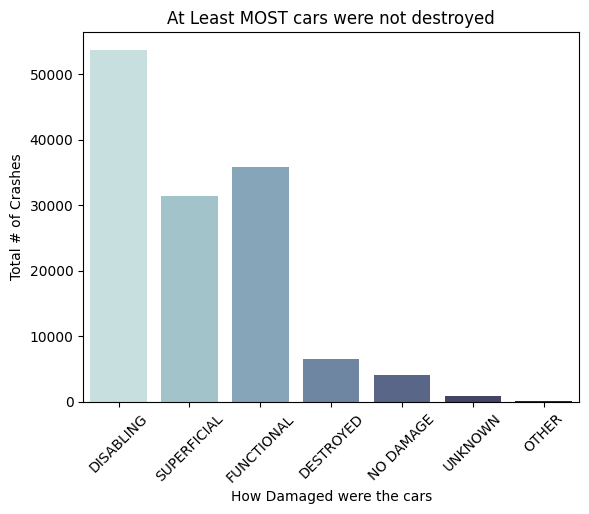

In [103]:
# How damaged was the car?

sns.countplot(x='Vehicle Damage Extent', data=cd, palette= "ch:start=.2,rot=-.3")
plt.xlabel('How Damaged were the cars'), plt.ylabel('Total # of Crashes'), plt.title('At Least MOST cars were not destroyed')
plt.xticks(rotation=45)
plt.show()



In [104]:
cd['Speed Limit'].value_counts()

35    42766
40    29029
30    19861
25    18551
45    10745
50     4038
55     3371
15     1670
0       695
20      670
10      541
5       463
60       62
65       47
70        6
75        1
Name: Speed Limit, dtype: int64

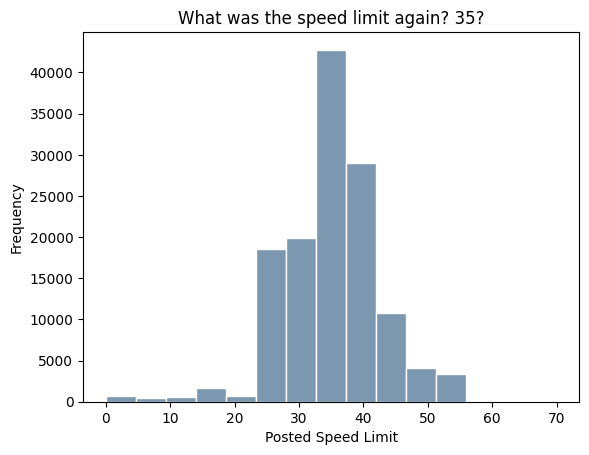

In [105]:
plt.hist(cd['Speed Limit'], bins=15, range=(0, 70), color='#7b98b0', edgecolor='white')
plt.xlabel('Posted Speed Limit'), plt.ylabel('Frequency'), plt.title('What was the speed limit again? 35?')

plt.show()


In [106]:
cd['Light'] = cd['Light'].replace(['UNKNOWN', 'OTHER', 'DARK -- UNKNOWN LIGHTING'], 'UNKNOWN/OTHER')
cd['Light'].value_counts()

DAYLIGHT          91986
DARK LIGHTS ON    29575
DARK NO LIGHTS     3847
DUSK               3004
DAWN               2747
UNKNOWN/OTHER      1357
Name: Light, dtype: int64

In [107]:
cd['Weather'] = cd['Weather'].replace(['UNKNOWN', 'OTHER'], 'UNKNOWN/OTHER')
cd['Weather'].value_counts()

CLEAR                       96514
RAINING                     18113
CLOUDY                      14743
SNOW                         1251
FOGGY                         574
UNKNOWN/OTHER                 522
WINTRY MIX                    353
SLEET                         195
SEVERE WINDS                  137
BLOWING SNOW                  101
BLOWING SAND, SOIL, DIRT       13
Name: Weather, dtype: int64

In [108]:
cd['Surface Condition'] = cd['Surface Condition'].replace(['UNKNOWN', 'OTHER'], 'UNKNOWN/OTHER')
cd['Surface Condition'].value_counts()

DRY                       104130
WET                        25888
ICE                          936
SNOW                         877
UNKNOWN/OTHER                394
SLUSH                        176
MUD, DIRT, GRAVEL             45
WATER(STANDING/MOVING)        39
OIL                           27
SAND                           4
Name: Surface Condition, dtype: int64

I want see if there is a relationship between the weather situation and whether or not the driver was at fault.

In [53]:
cd = cd[cd['Driver At Fault'] != 'Unknown']
cd['Driver At Fault'] = cd['Driver At Fault'].replace({'No': 0, 'Yes': 1})
cd['Driver At Fault'].value_counts()

1    65791
0    62688
Name: Driver At Fault, dtype: int64

In [65]:
columns = ['Light', 'Weather', 'Surface Condition', 'Driver At Fault']
cd2 = cd[columns]

In [66]:
le = LabelEncoder()
cd2['E_Light'] = le.fit_transform(cd['Light'])
cd2['E_Weather'] = le.fit_transform(cd['Weather'])
cd2['E_Surface_Condition'] = le.fit_transform(cd['Surface Condition'])

cd2.head()


<ipython-input-66-7c56cf3ba161>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2['E_Light'] = le.fit_transform(cd['Light'])
<ipython-input-66-7c56cf3ba161>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2['E_Weather'] = le.fit_transform(cd['Weather'])
<ipython-input-66-7c56cf3ba161>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Light,Weather,Surface Condition,Driver At Fault,E_Light,E_Weather,E_Surface_Condition
3,DAYLIGHT,CLEAR,DRY,1,3,2,0
4,DAYLIGHT,CLEAR,DRY,1,3,2,0
5,DAYLIGHT,CLEAR,DRY,1,3,2,0
6,DAYLIGHT,CLEAR,DRY,0,3,2,0
7,DAYLIGHT,CLEAR,DRY,1,3,2,0


In [81]:
X = cd.iloc[:, -3:]
y = cd['Driver At Fault']
X.head()

,Vehicle Year,Year,Car Age
3,2013,2023,10
4,2020,2023,3
5,2015,2023,8
6,2016,2023,7
7,2023,2023,0


In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=999)

In [119]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [120]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [0.04975416]
Coefficients [[-0.08559773  0.03357862  0.10645691]]


In [121]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.537266500622665
              precision    recall  f1-score   support

           0       0.53      0.50      0.51     15686
           1       0.55      0.57      0.56     16434

    accuracy                           0.54     32120
   macro avg       0.54      0.54      0.54     32120
weighted avg       0.54      0.54      0.54     32120



In [122]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[7838, 7848],
       [7015, 9419]])

Text(0.5, 427.9555555555555, 'Predicted label')

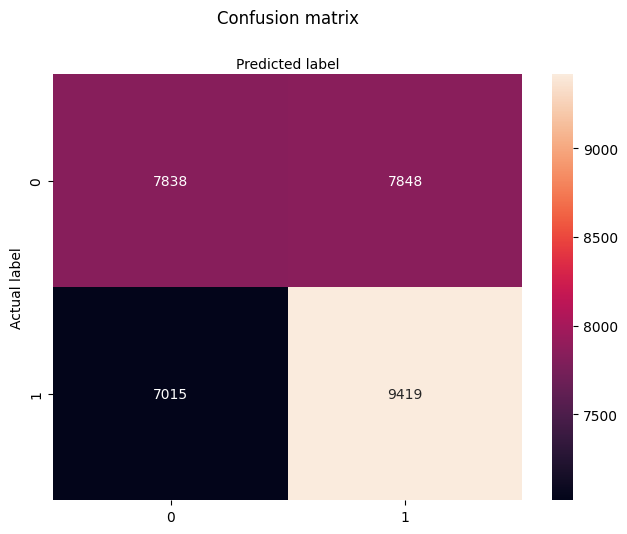

In [123]:
categories = [0,1]
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

sns.heatmap(pd.DataFrame(conf_mat), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
# Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.5354296388542964
Precision: 0.5449132650140265
Recall: 0.577163301194591


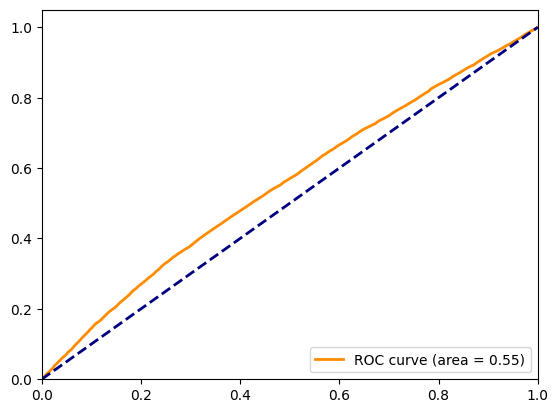

In [90]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()